In [1]:
import pandas, seaborn, scipy, numpy, matplotlib

%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


,Cisplatin,Signature 1,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 10,Signature 11,Signature 13,Signature 15,Signature 18,Signature 20,Signature 21,Signature 23,Signature 24,Signature 25,Signature 26,Signature 29
AOCS-034-13 new,0.000000,0.296900,0.358497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.107511,0.000000,0.00000,0.00000,0.000000,0.093438,0.000000,0.000000,0.000000,0.000000
AOCS-064-13 new,0.000000,0.215773,0.493527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080150
AOCS-065-13 new,0.000000,0.446555,0.374582,0.068627,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.071972,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AOCS-086-13 new,0.000000,0.350738,0.320231,0.087138,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,0.00000,0.000000,0.106142,0.000000,0.000000,0.000000,0.000000
AOCS-088-13 new,0.000000,0.268014,0.380697,0.098979,0.000000,0.000000,0.000000,0.100981,0.000000,0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AOCS-091-13 new,0.000000,0.425834,0.351360,0.072657,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AOCS-092-13 new,0.000000,0.231702,0.112244,0.205124,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,0.00000,0.000000,0.168761,0.000000,0.000000,0.000000,0.000000
AOCS-093-13 new,0.000000,0.228397,0.381853,0.102654,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AOCS-094-2 new,0.000000,0.345845,0.494803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AOCS-095-13 new,0.000000,0.388305,0.283115,0.151009,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


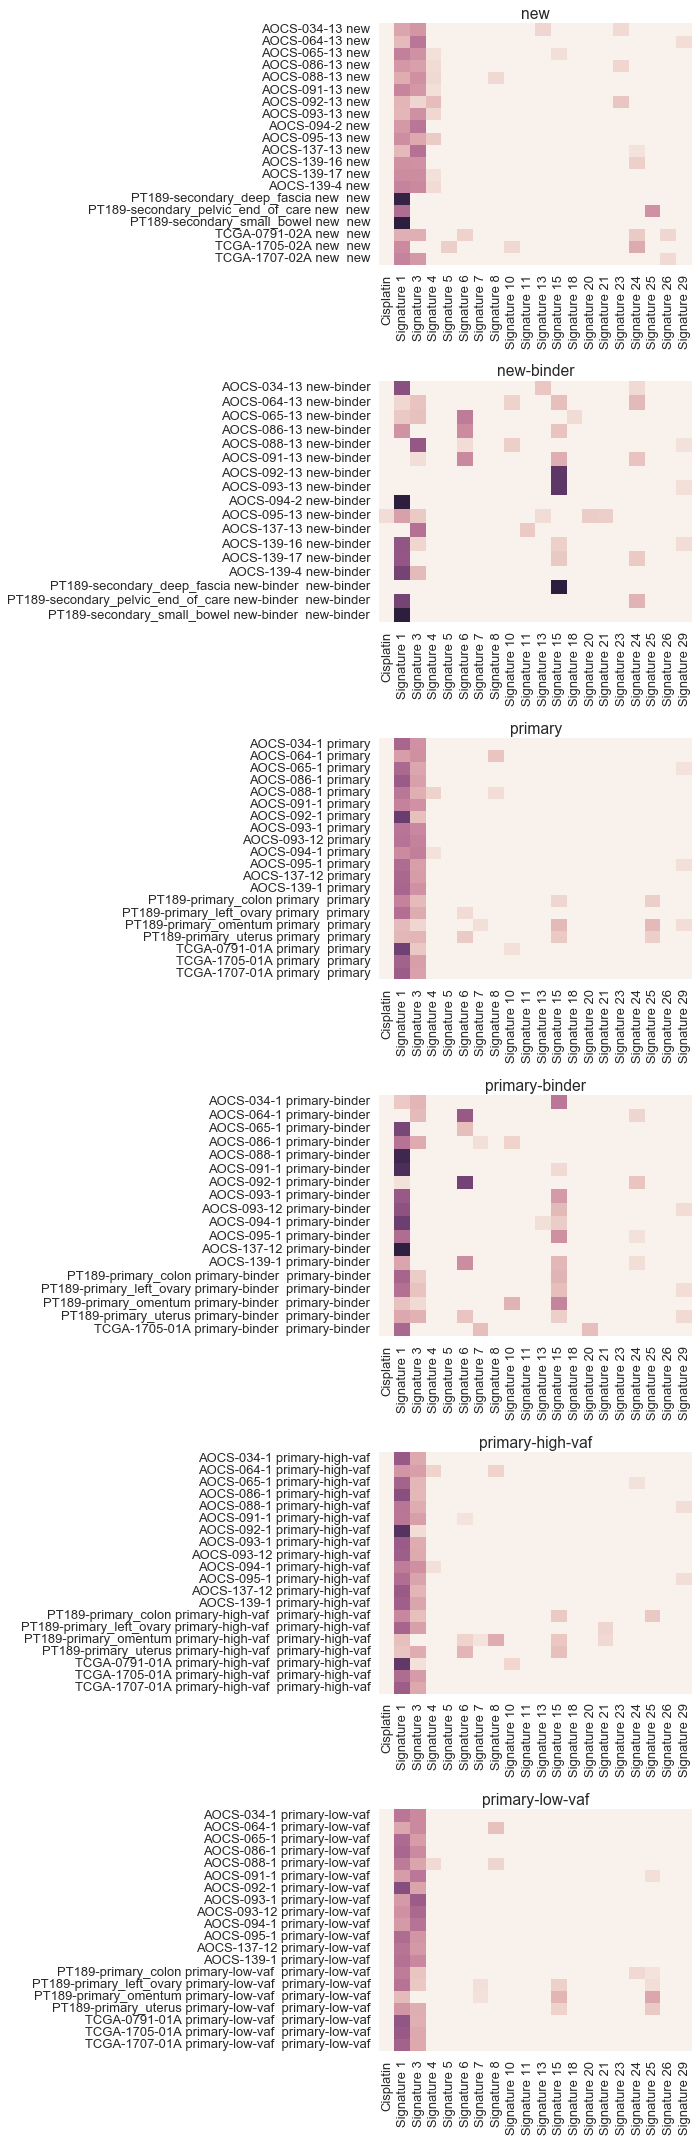

In [4]:
# deconstructSigs R package output
fig = pyplot.figure(figsize=(10,30))
deconstruct_sigs = pandas.read_csv("../data/deconstructsigs_output_extended.csv").fillna(0)
deconstruct_sigs.index = deconstruct_sigs.Sample
del deconstruct_sigs["Sample"]
del deconstruct_sigs["Unnamed: 0"]
deconstruct_sigs = deconstruct_sigs.ix[sorted(deconstruct_sigs.index, key=lambda x: (x.split()[-1], x))]
deconstruct_sigs = deconstruct_sigs[[x for x in deconstruct_sigs.columns if deconstruct_sigs[x].sum() > 0]]
#deconstruct_sigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.startswith("AOCS")]

deconstruct_sigs.index = [(x.split("/")[0] + " " + x.split(" ")[1]).strip() for x in deconstruct_sigs.index]

deconstruct_sigs_dict = {}
seaborn.set_context('talk')
#pyplot.title("A", loc="left")
keys = sorted(set(x.split()[-1] for x in deconstruct_sigs.index))
ax1 = pyplot.subplot(2, 1, 1)

for (i, key) in enumerate(keys):
    ax = pyplot.subplot(len(keys), 1, i + 1, sharex=ax1)
    pyplot.title(key)
    sub_decontructsigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.endswith(key)]
    deconstruct_sigs_dict[key] = sub_decontructsigs
    seaborn.heatmap(sub_decontructsigs, vmin=0, vmax=1.0, cbar=False)
pyplot.setp(ax1.get_xticklabels(), visible=False)

#ax2 = pyplot.subplot(2, 1, 2, sharex=ax1)
#pyplot.title("Unique to recurrence", loc="left")
#pyplot.title("B", loc="left")

#seaborn.heatmap(deconstruct_sigs.ix[ ~ deconstruct_sigs.index.str.contains("primary")], vmin=0, vmax=1.0, cbar=False)
#seaborn.heatmap(deconstruct_sigs)

#deconstruct_sigs
pyplot.tight_layout()

deconstruct_sigs
